In [178]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('insurance.csv')
df_columns = df.columns.tolist()  # features in df

print(f"df_columns: {df_columns}\n")

print(f"different values in column 'sex' {df['sex'].unique()}")
print(f"different values in column 'childern' {df['children'].unique()}")
print(f"different values in column 'smoker' {df['smoker'].unique()}")
print(f"different values in column 'region' {df['region'].unique()}")

df_columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

different values in column 'sex' ['female' 'male']
different values in column 'childern' [0 1 3 2 5 4]
different values in column 'smoker' ['yes' 'no']
different values in column 'region' ['southwest' 'southeast' 'northwest' 'northeast']


## Categorical variables
These are non-numeric categorical features
The data in 'sex, region, smoker' are examples of categorical variables

Subtypes: ordinal and v variables

#### Ordinal variables
Here the features have an order of importance like smoker < non-smoker, so we can assign 0 to smoker and 1 to non-smoker

#### Nominal variables
Here the features dont have an order of importance as such.
e.g. region

here we use one-hot encoding
explaination: 
initially we had just one feature: direction, we can split this into four different features and have binary assignment for each direction. problem solved!

In [179]:
X = [[] for _ in range(9)]
X[0] = df['age']
X[1] = df['bmi']
X[2] = df['children']

X[3] = df['sex']
X[4] = df['smoker']

X[5] = df['region']

# X = np.array(X)

Y = df['charges']
# Y = np.array(Y)

"""feature scaling: mean method: 'age', 'bmi', 'children'"""
# storing these values as we need 'em later to give predictions
feature_ranges = []
feature_means = []

for i in [0, 1, 2]:
    feature_ranges.append(max(X[i]) - min(X[i]))
    feature_means.append(sum(X[i]) / len(X[i]))
    
    X[i] -= feature_means[i]
    X[i] /= feature_ranges[i] 

Y_range = max(Y) - min(Y)
Y_mean = sum(Y) / len(Y)

Y -= Y_mean
Y /= Y_range


In [180]:
"""fixing ordinal variables: 'sex', 'smoker'"""
# sex
sex_fixed = []
for elem in X[3]:
    if elem == "female":
        sex_fixed.append(1)
    else:
        sex_fixed.append(0)

X[3] = sex_fixed
X[3] = np.array(X[3])

# smoker
smoke_fixed = []
for elem in X[4]:  
    if elem == "yes":
        smoke_fixed.append(1)
    else:
        smoke_fixed.append(0)

X[4] = smoke_fixed
X[4] = np.array(X[4])

In [181]:

# HIGHLY INEFFICIENT, FIX LATER

"""fixing nominal variables: one-hot encoding: 'region'"""
# 'southwest' 'southeast' 'northwest' 'northeast'
temp_X = [[] for _ in range(9)]

for elem in X[5]:
    if elem == "southwest":
        temp_X[5].append(1)
        temp_X[6].append(0)
        temp_X[7].append(0)
        temp_X[8].append(0)
    elif elem == "southeast":
        temp_X[5].append(0)
        temp_X[6].append(1)
        temp_X[7].append(0)
        temp_X[8].append(0)
    elif elem == "northwest":
        temp_X[5].append(0)
        temp_X[6].append(0)
        temp_X[7].append(1)
        temp_X[8].append(0)
    elif elem == "northeast":
        temp_X[5].append(0)
        temp_X[6].append(0)
        temp_X[7].append(0)
        temp_X[8].append(1)

for i in [5,6,7,8]:
    X[i] = temp_X[i]

for i in range(9):
    X[i] = np.array(X[i])

Y = np.array(Y)

In [221]:
import random

def update(lr):
    w = np.array([random.uniform(-1, 1) for _ in range(len(X))])
    b = random.uniform(-1, 1)
    
    Y_pred = np.dot(w, X) + b

    # Gradient descent
    dw = -1/len(Y) * (X @ (Y - Y_pred))
    db = -1/len(Y) * (Y - Y_pred)

    w -= lr * dw
    b -= lr * db

    J = 1/(2*len(Y)) * np.sum((Y - Y_pred)**2)
    return J


J = []
learning_rate = 10**(-3)

decay_steps = 10
decay_rate = 0.1

J.append(update(learning_rate))
J.append(update(learning_rate))

while True:
  J.append(update(learning_rate))

  if len(J) % decay_steps == 0:
    learning_rate *= learning_rate

  if abs(J[-1] - J[-2]) < 10**(-3):
    print(f"Final cost = {J[-1]} achieved in {len(J)} steps.")
    break

Final cost = 0.4228354671580218 achieved in 114 steps.


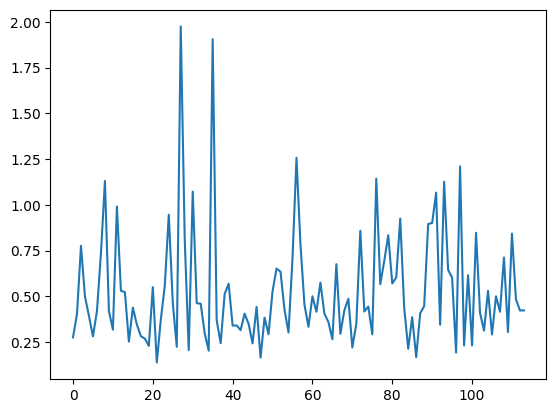

0.2756177111470371


In [222]:
x = np.arange(len(J))
plt.plot(x, J)
plt.show()

print(J[0])